In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')




In [19]:
raw_data

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,인구밀도,범죄총계(구),예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,0.01,328.0,3.59
1,강원도,강릉시,성산면,0.0,3393.0,3.0,0.0,0.00,328.0,0.71
2,강원도,강릉시,왕산면,0.0,1648.0,2.0,0.0,0.00,328.0,0.35
3,강원도,강릉시,구정면,0.0,4096.0,5.0,0.0,0.00,328.0,0.86
4,강원도,강릉시,강동면,1.0,4690.0,3.0,0.0,0.00,328.0,0.99
...,...,...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,3508.0,4.0,0.0,0.04,980.0,40.80
639,충청북도,진천군,문백면,1.0,4147.0,4.0,0.0,0.05,980.0,48.23
640,충청북도,진천군,백곡면,1.0,2167.0,2.0,0.0,0.03,980.0,25.20
641,충청북도,진천군,이월면,0.0,8078.0,6.0,0.0,0.10,980.0,93.95


In [18]:
raw_data = pd.read_csv('Dataset/total/Raw_data.csv')

In [17]:
Dataset = pd.read_csv('Dataset/total/Final_Dataset.csv')

In [12]:
display('Raw_Data.head()')
display(raw_data.head())

'Raw_Data.head()'

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,인구밀도,범죄총계(구),예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,0.01,328.0,3.59
1,강원도,강릉시,성산면,0.0,3393.0,3.0,0.0,0.00,328.0,0.71
2,강원도,강릉시,왕산면,0.0,1648.0,2.0,0.0,0.00,328.0,0.35
3,강원도,강릉시,구정면,0.0,4096.0,5.0,0.0,0.00,328.0,0.86
4,강원도,강릉시,강동면,1.0,4690.0,3.0,0.0,0.00,328.0,0.99


In [10]:
display('Scaled_Dataset.head()')
display(Dataset.head())

'Scaled_Dataset.head()'

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄비율
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,1.0,0.000258
1,강원도,강릉시,성산면,0.0,3393.0,3.0,0.0,1.0,0.000051
2,강원도,강릉시,왕산면,0.0,1648.0,2.0,0.0,0.0,0.000025
3,강원도,강릉시,구정면,0.0,4096.0,5.0,0.0,0.0,0.000062
4,강원도,강릉시,강동면,1.0,4690.0,3.0,0.0,0.0,0.000071


In [28]:
display('Dataset.correlation matrix')
display(Dataset.corr())

'Dataset.correlation matrix'

,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄비율
설치유무,1.000000,-0.094284,-0.006521,-0.096913,0.091346,0.231305
등록인구수,-0.094284,1.000000,0.811589,0.788874,0.006554,0.235147
어린이보호구역개수,-0.006521,0.811589,1.000000,0.741144,-0.014155,0.170189
화재발생횟수,-0.096913,0.788874,0.741144,1.000000,-0.004895,0.080852
관광지개수,0.091346,0.006554,-0.014155,-0.004895,1.000000,0.078242
예상범죄비율,0.231305,0.235147,0.170189,0.080852,0.078242,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

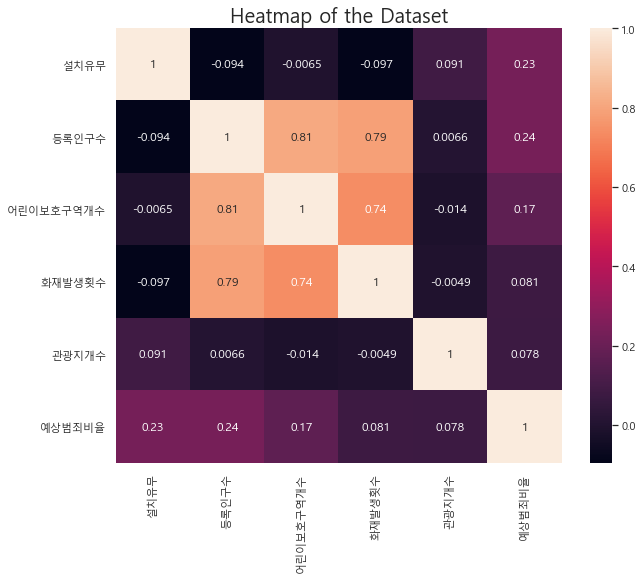

In [20]:
sns.heatmap(Dataset[['설치유무','등록인구수','어린이보호구역개수','화재발생횟수','관광지개수','예상범죄비율']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [30]:
Dataset.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄비율
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,1.0,0.000258


In [32]:
sns.lmplot(data=Dataset, x='등록인구수',y='예상범죄비율','')

ValueError: scatter requires an x and y column